In [1]:
#import essentials
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('train.csv')
deploy = pd.read_csv('test.csv')

# EDA(Exploratory Data Analysis)

In [2]:
print(data.info())
display(data.sample(10))
#also check for unique id
print('number of unique id:'+str(len(data.Id.unique())))
print('number of rows:'+str(len(data)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
682,683,120,RL,NaN,2887,Pave,NaN,Reg,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,173000
1272,1273,20,RL,NaN,13526,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,11,2006,WD,Normal,137000
1379,1380,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500
794,795,60,RL,NaN,10832,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2008,WD,Normal,194500
323,324,20,RM,49.0,5820,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,126175
524,525,60,RL,95.0,11787,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,315750
1172,1173,160,FV,35.0,4017,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,171900
709,710,20,RL,NaN,7162,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,12,2008,WD,Abnorml,109900
1037,1038,60,RL,NaN,9240,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,287000
572,573,60,RL,83.0,13159,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,7,2009,New,Partial,224500


number of unique id:1460
number of rows:1460


In [3]:
#check for missing values
numofmv = data.isnull().sum()/len(data)
print('Columns that has missing values:\n{}'.format(numofmv[numofmv>0]))
print('Columns that has large missing values:\n{}'.format(numofmv[numofmv>0.3]))


Columns that has missing values:
LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64
Columns that has large missing values:
Alley          0.937671
FireplaceQu    0.472603
PoolQC         0.995205
Fence          0.807534
MiscFeature    0.963014
dtype: float64


In [4]:
#drop columns with large missing values and Id since each row is already unique
data.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature','Id'],axis = 1,inplace = True)

The case with big data is that sometimes there are too much input to be use. We should select the variables to use, either by reducing it or by through common sense. For this data, the first neutral way to reduce the data is to look at numerical variables and reduce the ones that has little to no variance. We can say that when a certain variable has little variance or even close to zero variance, the variable has little to no contribution in helping prediction.

## Handling Numerical Variables

In [5]:
numeric = data.select_dtypes(exclude=['object']).drop('SalePrice',axis = 1)
numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

We can't include all integer variables in the selection through variance process since some of the integer variables are actually an encoded categorical variables. We select some integer variables that actually shows a numeric value in measuring something.

To compare the variance of variables, we must consider on how the numerical variables was measured. This is to understand the normal deviation of the variables we focus on. We exclude LotFrontage, MiscvVal, and MoSold since they don't have any other variables to compare to. We also exclude MSSubClass since it's actually an encoded categorical variables.

In [6]:
numcount = numeric[['BsmtFullBath','BsmtHalfBath','FullBath',
                    'HalfBath','BedroomAbvGr','KitchenAbvGr',
                    'TotRmsAbvGrd','Fireplaces','GarageCars']][:]
numrating = numeric[['OverallQual','OverallCond']][:]
numyear = numeric[['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt']][:]
numarea = numeric.loc[:, ~numeric.columns.isin(['LotFrontage', 'MiscVal','MoSold',
                                                'YearBuilt','YearRemodAdd','YrSold',
                                                'BsmtFullBath','BsmtHalfBath','FullBath',
                                                'HalfBath','BedroomAbvGr','KitchenAbvGr',
                                                'TotRmsAbvGrd','Fireplaces','GarageYrBlt',
                                                'GarageCars','OverallQual','OverallCond',
                                                'MSSubClass'])]

display(numcount.describe())
display(numrating.describe())
display(numyear.describe())
display(numarea.describe())

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123
std,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000
50%,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000
75%,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000
max,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000


,OverallQual,OverallCond
count,1460.000000,1460.000000
mean,6.099315,5.575342
std,1.382997,1.112799
min,1.000000,1.000000
25%,5.000000,5.000000
50%,6.000000,5.000000
75%,7.000000,6.000000
max,10.000000,9.000000


,YearBuilt,YearRemodAdd,YrSold,GarageYrBlt
count,1460.000000,1460.000000,1460.000000,1379.000000
mean,1971.267808,1984.865753,2007.815753,1978.506164
std,30.202904,20.645407,1.328095,24.689725
min,1872.000000,1950.000000,2006.000000,1900.000000
25%,1954.000000,1967.000000,2007.000000,1961.000000
50%,1973.000000,1994.000000,2008.000000,1980.000000
75%,2000.000000,2004.000000,2009.000000,2002.000000
max,2010.000000,2010.000000,2010.000000,2010.000000


,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
count,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904
std,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307
min,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000
75%,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000
max,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000


In [7]:
data.drop(['BsmtHalfBath','KitchenAbvGr','YrSold'],axis = 1,inplace = True)

In [8]:
#Check for correlations
corr = data.corr()['SalePrice']
print(corr)
print('\n\n\nCorrelations above 0.3 or below -0.3:\n{}'.format(corr[(corr>0.3)|(corr<-0.3)]))

MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
SalePrice        1.000000
Name: SalePrice, dtype: float64



Correlations above 0.3 or below -0.3:
LotFrontage     0.351799
OverallQual     0.

## Handling Categorical Variables

For categorical variables, we can check it's dependency to the target variable using a couple of method. If the target variable is also a categorical variable, it is common to use Chi Squared Test. If the target variable is numerical variable, we can run a simple linear regression to see each categorical variables relation with the target variable which is sometimes deemed not really good or we can split the target variable(which is numerical) into categories.

In this case, we'll try to split the target variable into different classes. We'll split the target variables into 5 equal classes. Then, we'll test for dependency using Chi Square Test. We will choose categorical variables that rejects the null hypothesis (categorical variable is independent against target variable) of our Chi Square Test.

In [9]:
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.preprocessing import OrdinalEncoder
obj = data.select_dtypes(include=['object'])
datafscat = data.loc[:, data.columns.isin(obj.columns)]
datafscat['target'] = data['SalePrice'][:]
datafscat.dropna(inplace = True)
datafscat['target'] = pd.qcut(datafscat['target'], 5, labels=np.arange(5) + 1)

#transform to integer
oe = OrdinalEncoder()
objtrans = oe.fit_transform(datafscat.drop('target',axis = 1))

fstat_cat, pval_cat = chi2(objtrans,datafscat['target'])
sig_table = pd.DataFrame(obj.columns)
sig_table['p_value'] = np.around(pval_cat,2)
display(sig_table[sig_table.p_value<0.05])



C:\Users\921000~1\AppData\Local\Temp/ipykernel_11672/2139352613.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datafscat['target'] = data['SalePrice'][:]
C:\Users\921000471\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\921000~1\AppData\Local\Temp/ipykernel_11672/2139352613.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,0,p_value
0,MSZoning,0.01
2,LotShape,0.00
6,LandSlope,0.01
7,Neighborhood,0.00
10,BldgType,0.00
11,HouseStyle,0.00
12,RoofStyle,0.00
14,Exterior1st,0.00
15,Exterior2nd,0.00
17,ExterQual,0.00


## Final Choosen Variables

we can see that this method reduces the numeric variables by a lot. Now lets pick the numerical variables with high correlation and the categorical data.

In [10]:
objectfin = data.loc[:,data.columns.isin(list(sig_table[sig_table.p_value<0.05][0]))]
numfin = data.loc[:, data.columns.isin(list(corr[(corr>0.3)|(corr<-0.3)].index))]
#sanity check
print('numerical columns:\n{}'.format(list(numfin.columns)))
print('numerical number of columns = {}\n\n'.format(len(numfin.columns)))
print('categorical columns:\n{}'.format(list(objectfin.columns)))
print('categorical number of columns = {}'.format(len(objectfin.columns)))

numerical columns:
['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']
numerical number of columns = 19


categorical columns:
['MSZoning', 'LotShape', 'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual', 'GarageType', 'GarageFinish', 'SaleCondition']
categorical number of columns = 21


we successfully reduce the columns from 80 to 40 (count including SalePrice). It's reduced by half! Now we try to reduce the numerical variables again using PCA. PCA can give us some sense of which variables can represent other variables.

In [11]:
#re check for missing values in the numerical columns
numfin.isnull().sum()/len(numfin)

LotFrontage     0.177397
OverallQual     0.000000
YearBuilt       0.000000
YearRemodAdd    0.000000
MasVnrArea      0.005479
BsmtFinSF1      0.000000
TotalBsmtSF     0.000000
1stFlrSF        0.000000
2ndFlrSF        0.000000
GrLivArea       0.000000
FullBath        0.000000
TotRmsAbvGrd    0.000000
Fireplaces      0.000000
GarageYrBlt     0.055479
GarageCars      0.000000
GarageArea      0.000000
WoodDeckSF      0.000000
OpenPorchSF     0.000000
SalePrice       0.000000
dtype: float64

Since we have multiple missing values on our numerical data, we can alternatively use the correlation matrix as our PCA input. This also removes the necessity to scale the data before doing PCA since the correlation matrix is already on the same scale.

refer to this link: https://stats.stackexchange.com/questions/53/pca-on-correlation-or-covariance

In [12]:
from sklearn.decomposition import PCA
forpca = numfin.drop('SalePrice',axis = 1).corr()
pca = PCA(svd_solver = 'full')
pca.fit(forpca)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("Number of Principal Components")
    plt.ylabel("Percentage Explained Variance")
    plt.title("Scree Plot")
    plt.show(block=False)

[0.31635003 0.55746552 0.7371359  0.79320511 0.83904941 0.87923104
 0.91254283 0.94140408 0.96299597 0.97614726 0.98529535 0.99115195
 0.99467944 0.9969518  0.99836008 0.99943159 1.         1.        ]


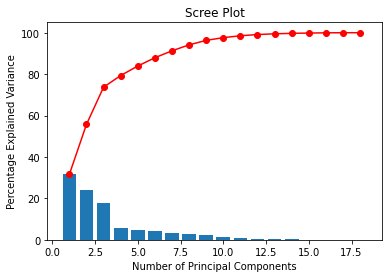

In [13]:
expvar = np.round(pca.explained_variance_ratio_,5) 
expvar
print(pca.explained_variance_ratio_.cumsum())
display_scree_plot(pca) 
#I want to retain around 90% of the original data variance
#we need 7 variables to have 91.3% of the variance explained


In [14]:
pcanew = PCA(n_components = 7,svd_solver = 'full')
pcanew.fit(forpca)
loadings = pd.DataFrame(pcanew.components_.T, columns=['PC1', 'PC2','PC3','PC4',
                                                       'PC5','PC6','PC7'], index=forpca.columns)
loadings[(loadings>0.3)|(loadings<-0.3)]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
LotFrontage,NaN,NaN,NaN,NaN,NaN,-0.483609,-0.330114
OverallQual,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearBuilt,-0.410219,NaN,NaN,NaN,NaN,NaN,NaN
YearRemodAdd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MasVnrArea,NaN,NaN,NaN,NaN,0.315595,0.623758,NaN
BsmtFinSF1,NaN,0.371205,NaN,NaN,NaN,NaN,NaN
TotalBsmtSF,NaN,NaN,-0.306953,NaN,NaN,NaN,NaN
1stFlrSF,NaN,0.305133,-0.407509,NaN,NaN,NaN,NaN
2ndFlrSF,0.417907,-0.393797,NaN,NaN,NaN,NaN,NaN
GrLivArea,NaN,NaN,-0.394226,NaN,NaN,NaN,NaN


We can interpret the loadings as the 'correlation' between a variable and a component. I personally only watch loadings that have value above 0.3 or below -0.3 since it indicates a certain good 'correlation' between a variable and a component. The followings are the interpretation for each components:

PC1 = the first component talks about how old the house is. Judging from the loadings, the older the house and the garage is, the the more space the 2nd floor has. We can choose YearBuilt to represent the age of the house.

PC2 = the second component talks about the area of the house. This component indicates that the larger the first floor of the house or the fine basement is, the less space the 2nd floor has and the less number of FullBath is available. The 2nd component also has different conclusion with the first component. This component indicates that when a house has a large first floor, the 2nd floor has less space and the garage tends to be older. The brief conclusion is, this component talks about the area of the house. Considering this, we choose 1stFlrSF as the representative variable.

PC3 = the third component talks about the large first floor equals large basement equals good living area grade equals many good rooms within the house. Since this component speaks about the living grade of a house, we will choose GrLivArea.

PC4 = the fourth component talks about how large the porch of the house is and how large the area of the house is made of wood deck. We choose OpenPorchSF to represent this component.

PC5 = the fifth component talks about additional area within the house such as masonry veneer area and garage area. We use GarageArea to represent this component.

PC6 = the sixth component talks about the large of masonry veneer area to distance of street connected to the property. Since masonry veneer area is relevant within the fifth component and somehow describe the distance of street connected to the property, we will choose masonry veneer for this component.

PC7 = the seventh component discuss about the OpenPorchSF space towards the number of cars and fireplace within the house. This component also somehow describe the distance of street connected to the property. We choose the number of fireplace to describe this component since we have choose to OpenPorch and GarageArea as representatives in the previous components.

In [25]:
finaldata = pd.concat([data.loc[:,data.columns.isin(list(sig_table[sig_table.p_value<0.05][0]))],
                       data[['YearBuilt','1stFlrSF','GrLivArea',
                             'OpenPorchSF','GarageArea','MasVnrArea',
                             'Fireplaces','SalePrice']]],axis = 1)
finaldata.shape

(1460, 29)

# Data Modeling

successfully reducing the data into "important" variables only, we will now try to model the data. The models that I will compare and use will be XGBoost and CatBoost since both models are currently hot on the market right now.

In [44]:
from sklearn.model_selection import train_test_split

x = finaldata.drop('SalePrice',axis = 1)
y = finaldata.SalePrice

xtrain, xsplit, ytrain, ysplit = train_test_split(x,y,test_size = 0.3, random_state = 42)
xtest,xval,ytest,yval = train_test_split(xsplit,ysplit,test_size = 0.5, random_state = 42)

xtrain.reset_index(drop=True,inplace = True)
ytrain.reset_index(drop=True,inplace = True)

xtest.reset_index(drop=True,inplace = True)
ytest.reset_index(drop=True,inplace = True)

xval.reset_index(drop=True, inplace = True)
yval.reset_index(drop=True, inplace = True)

In [57]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

#since we're using a tree algorithm, we don't need to scale the numeric variables

numimp = SimpleImputer(strategy='median')
catimp = SimpleImputer(strategy='most_frequent')
oemodel = OrdinalEncoder(handle_unknown = 'use_encoded_value',unknown_value = 100)

def preprocess(rawdat,train=True):
    num = rawdat.select_dtypes(exclude=['object'])
    cat = rawdat.select_dtypes(include=['object'])
    if train == True:
        numfill = pd.DataFrame(numimp.fit_transform(num),columns = num.columns)
        catfill = pd.DataFrame(catimp.fit_transform(cat),columns = cat.columns)
        catenc = pd.DataFrame(oemodel.fit_transform(catfill),columns = catfill.columns)
        
        findat = pd.concat([numfill,catenc],axis = 1)
    else:
        numfill = pd.DataFrame(numimp.transform(num),columns = num.columns)
        catfill = pd.DataFrame(catimp.transform(cat),columns = cat.columns)
        catenc = pd.DataFrame(oemodel.transform(catfill),columns = catfill.columns)
        
        findat = pd.concat([numfill,catenc],axis = 1)
    
    return findat
        
        
xtrainpreprocessed = preprocess(xtrain, train = True)
xtestpreprocessed = preprocess(xtest, train = False)
xvalpreprocessed = preprocess(xval, train = False)

RMSE of prediction on test data:34925.70767852741


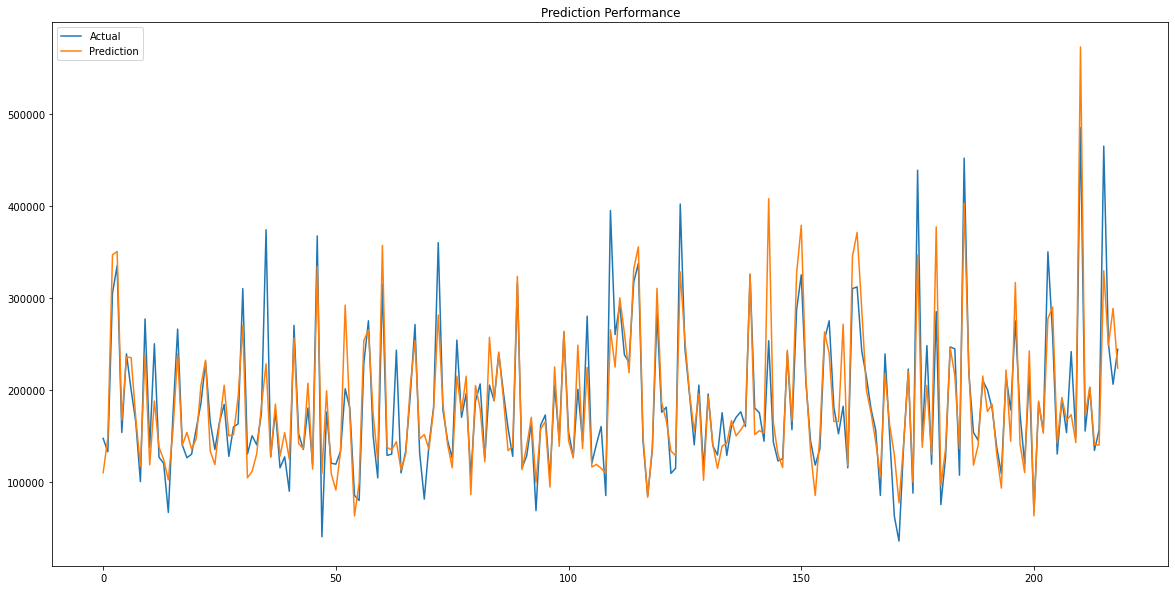

In [81]:
xgb = XGBRegressor(booster='gbtree',random_state = 42,
                   eval_metric = 'rmse',
                   max_depth=28,
                   objective='reg:squarederror',
                   n_estimators = 1000)
xgb.fit(xtrainpreprocessed,ytrain)
xgbpred = xgb.predict(xtestpreprocessed)
xgbfinalpred = np.where(xgbpred<0,0,xgbpred)

print('RMSE of prediction on test data:'+str(mean_squared_error(ytest,xgbfinalpred,squared = False)))

plt.figure(figsize=(20, 10))
plt.plot(ytest.reset_index(drop=True),label ='Actual')
plt.plot(pd.Series(xgbfinalpred).reset_index(drop=True),label = 'Prediction')
plt.legend()
plt.title('Prediction Performance')
plt.show()

Learning rate set to 0.041084
0:	learn: 75689.1429258	total: 6.09ms	remaining: 6.08s
1:	learn: 73957.9876351	total: 9.69ms	remaining: 4.83s
2:	learn: 72067.7932276	total: 15.2ms	remaining: 5.06s
3:	learn: 70229.3421815	total: 18ms	remaining: 4.48s
4:	learn: 68512.4344168	total: 21.2ms	remaining: 4.21s
5:	learn: 67021.3858395	total: 23.9ms	remaining: 3.97s
6:	learn: 65654.3457442	total: 27.5ms	remaining: 3.9s
7:	learn: 64202.7788805	total: 30.7ms	remaining: 3.8s
8:	learn: 62925.1734836	total: 33.5ms	remaining: 3.69s
9:	learn: 61452.3863120	total: 36.3ms	remaining: 3.59s
10:	learn: 60119.9150431	total: 38.6ms	remaining: 3.47s
11:	learn: 58987.9678786	total: 41.5ms	remaining: 3.42s
12:	learn: 57725.5192951	total: 43.9ms	remaining: 3.33s
13:	learn: 56555.3612238	total: 46.7ms	remaining: 3.29s
14:	learn: 55471.4673630	total: 49.2ms	remaining: 3.23s
15:	learn: 54372.5341377	total: 51.7ms	remaining: 3.18s
16:	learn: 53352.9167913	total: 54.6ms	remaining: 3.16s
17:	learn: 52409.6695509	total: 

166:	learn: 20858.9460158	total: 476ms	remaining: 2.38s
167:	learn: 20817.7074834	total: 480ms	remaining: 2.38s
168:	learn: 20765.4015560	total: 484ms	remaining: 2.38s
169:	learn: 20716.0984740	total: 488ms	remaining: 2.38s
170:	learn: 20660.3815908	total: 492ms	remaining: 2.38s
171:	learn: 20592.6691767	total: 494ms	remaining: 2.38s
172:	learn: 20549.3895230	total: 498ms	remaining: 2.38s
173:	learn: 20505.0356115	total: 501ms	remaining: 2.38s
174:	learn: 20456.4116196	total: 503ms	remaining: 2.37s
175:	learn: 20420.3710596	total: 506ms	remaining: 2.37s
176:	learn: 20374.1690306	total: 509ms	remaining: 2.37s
177:	learn: 20356.6498915	total: 511ms	remaining: 2.36s
178:	learn: 20289.1766203	total: 514ms	remaining: 2.36s
179:	learn: 20271.4290310	total: 518ms	remaining: 2.36s
180:	learn: 20240.4972284	total: 520ms	remaining: 2.35s
181:	learn: 20192.3010089	total: 524ms	remaining: 2.35s
182:	learn: 20145.3190169	total: 528ms	remaining: 2.36s
183:	learn: 20112.9245048	total: 531ms	remaining

325:	learn: 15631.9973510	total: 967ms	remaining: 2s
326:	learn: 15603.6696431	total: 971ms	remaining: 2s
327:	learn: 15585.6178019	total: 973ms	remaining: 1.99s
328:	learn: 15553.7242240	total: 975ms	remaining: 1.99s
329:	learn: 15527.2637164	total: 981ms	remaining: 1.99s
330:	learn: 15511.1593262	total: 984ms	remaining: 1.99s
331:	learn: 15500.7392737	total: 987ms	remaining: 1.99s
332:	learn: 15481.1996159	total: 990ms	remaining: 1.98s
333:	learn: 15466.1522963	total: 996ms	remaining: 1.99s
334:	learn: 15435.8441286	total: 999ms	remaining: 1.98s
335:	learn: 15412.0604186	total: 1s	remaining: 1.98s
336:	learn: 15387.8598789	total: 1s	remaining: 1.97s
337:	learn: 15369.9486768	total: 1.01s	remaining: 1.97s
338:	learn: 15347.9722166	total: 1.01s	remaining: 1.97s
339:	learn: 15328.1471006	total: 1.01s	remaining: 1.96s
340:	learn: 15302.3051491	total: 1.01s	remaining: 1.96s
341:	learn: 15277.2603824	total: 1.02s	remaining: 1.96s
342:	learn: 15269.9813683	total: 1.02s	remaining: 1.95s
343:

481:	learn: 12561.0205633	total: 1.45s	remaining: 1.56s
482:	learn: 12543.1744235	total: 1.45s	remaining: 1.55s
483:	learn: 12529.7205259	total: 1.46s	remaining: 1.55s
484:	learn: 12509.9326409	total: 1.46s	remaining: 1.55s
485:	learn: 12492.2011098	total: 1.46s	remaining: 1.55s
486:	learn: 12482.2459737	total: 1.47s	remaining: 1.54s
487:	learn: 12457.2556213	total: 1.47s	remaining: 1.54s
488:	learn: 12430.4268037	total: 1.47s	remaining: 1.54s
489:	learn: 12426.9873467	total: 1.47s	remaining: 1.53s
490:	learn: 12397.3706060	total: 1.48s	remaining: 1.53s
491:	learn: 12383.5396872	total: 1.48s	remaining: 1.53s
492:	learn: 12359.4484389	total: 1.48s	remaining: 1.53s
493:	learn: 12344.0733132	total: 1.49s	remaining: 1.52s
494:	learn: 12336.1186469	total: 1.49s	remaining: 1.52s
495:	learn: 12307.8740311	total: 1.49s	remaining: 1.52s
496:	learn: 12289.7446951	total: 1.5s	remaining: 1.51s
497:	learn: 12277.6651531	total: 1.5s	remaining: 1.51s
498:	learn: 12253.1325129	total: 1.5s	remaining: 1

637:	learn: 10362.6111738	total: 1.93s	remaining: 1.09s
638:	learn: 10339.1378817	total: 1.93s	remaining: 1.09s
639:	learn: 10323.9357084	total: 1.94s	remaining: 1.09s
640:	learn: 10316.4474516	total: 1.94s	remaining: 1.08s
641:	learn: 10302.6302905	total: 1.94s	remaining: 1.08s
642:	learn: 10291.1074932	total: 1.95s	remaining: 1.08s
643:	learn: 10280.6008162	total: 1.95s	remaining: 1.08s
644:	learn: 10269.3033003	total: 1.95s	remaining: 1.07s
645:	learn: 10265.0913608	total: 1.95s	remaining: 1.07s
646:	learn: 10250.2898020	total: 1.96s	remaining: 1.07s
647:	learn: 10226.4164470	total: 1.96s	remaining: 1.06s
648:	learn: 10212.6531040	total: 1.96s	remaining: 1.06s
649:	learn: 10201.7382032	total: 1.97s	remaining: 1.06s
650:	learn: 10188.1661874	total: 1.97s	remaining: 1.05s
651:	learn: 10180.4634604	total: 1.97s	remaining: 1.05s
652:	learn: 10166.2297490	total: 1.97s	remaining: 1.05s
653:	learn: 10156.9957881	total: 1.98s	remaining: 1.04s
654:	learn: 10143.3187094	total: 1.98s	remaining

815:	learn: 8465.6085196	total: 2.42s	remaining: 545ms
816:	learn: 8455.2898939	total: 2.42s	remaining: 542ms
817:	learn: 8451.2115523	total: 2.42s	remaining: 539ms
818:	learn: 8445.8664663	total: 2.43s	remaining: 536ms
819:	learn: 8434.5747846	total: 2.43s	remaining: 533ms
820:	learn: 8428.4206742	total: 2.43s	remaining: 530ms
821:	learn: 8421.0803823	total: 2.43s	remaining: 527ms
822:	learn: 8407.9370746	total: 2.44s	remaining: 524ms
823:	learn: 8403.7800508	total: 2.44s	remaining: 521ms
824:	learn: 8400.8902375	total: 2.44s	remaining: 518ms
825:	learn: 8390.9649055	total: 2.45s	remaining: 515ms
826:	learn: 8384.9809729	total: 2.45s	remaining: 512ms
827:	learn: 8375.3818870	total: 2.45s	remaining: 509ms
828:	learn: 8373.7195009	total: 2.45s	remaining: 506ms
829:	learn: 8359.5798936	total: 2.46s	remaining: 503ms
830:	learn: 8344.0034321	total: 2.46s	remaining: 500ms
831:	learn: 8340.9912492	total: 2.46s	remaining: 497ms
832:	learn: 8330.9093658	total: 2.46s	remaining: 494ms
833:	learn

985:	learn: 7259.6679685	total: 2.91s	remaining: 41.3ms
986:	learn: 7255.4446683	total: 2.91s	remaining: 38.3ms
987:	learn: 7252.8990508	total: 2.91s	remaining: 35.4ms
988:	learn: 7246.3917538	total: 2.92s	remaining: 32.4ms
989:	learn: 7243.4184453	total: 2.92s	remaining: 29.5ms
990:	learn: 7235.3723700	total: 2.92s	remaining: 26.5ms
991:	learn: 7229.4614693	total: 2.92s	remaining: 23.6ms
992:	learn: 7225.5361253	total: 2.93s	remaining: 20.6ms
993:	learn: 7217.2510232	total: 2.93s	remaining: 17.7ms
994:	learn: 7203.9705248	total: 2.94s	remaining: 14.7ms
995:	learn: 7196.8333462	total: 2.94s	remaining: 11.8ms
996:	learn: 7187.0327538	total: 2.94s	remaining: 8.85ms
997:	learn: 7182.0994011	total: 2.94s	remaining: 5.9ms
998:	learn: 7174.7973409	total: 2.94s	remaining: 2.95ms
999:	learn: 7167.3696873	total: 2.95s	remaining: 0us
RMSE of prediction on test data:25879.92126169139


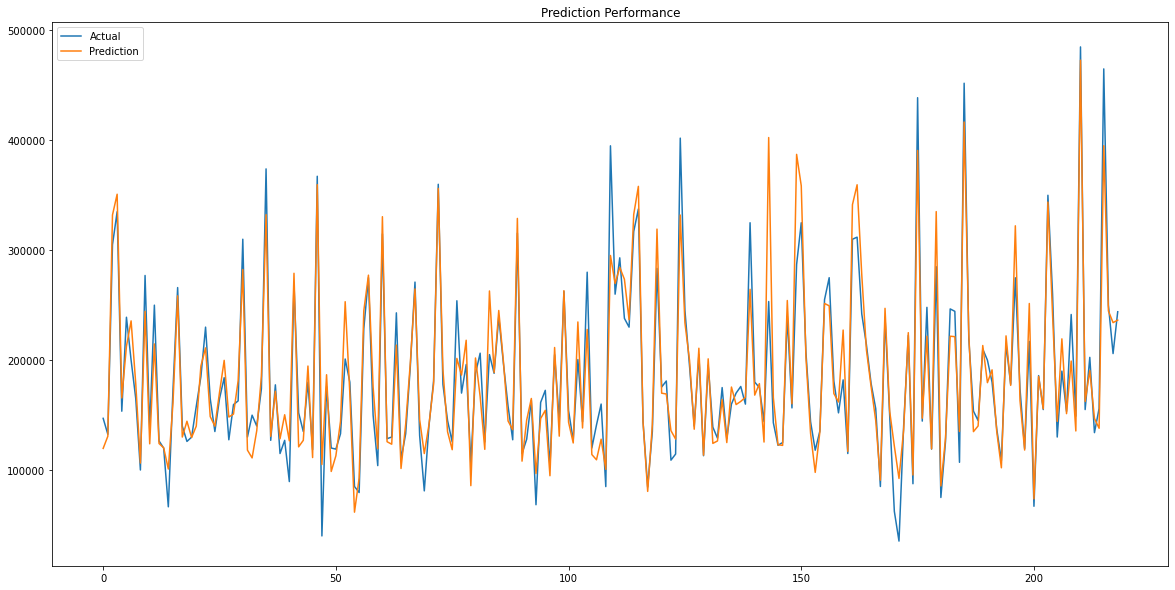

In [69]:
cb = CatBoostRegressor(random_state = 42)

cb.fit(xtrainpreprocessed,ytrain)
cbpred = cb.predict(xtestpreprocessed)
cbfinalpred = np.where(cbpred<0,0,cbpred)

print('RMSE of prediction on test data:'+str(mean_squared_error(ytest,cbfinalpred,squared = False)))

plt.figure(figsize=(20, 10))
plt.plot(ytest.reset_index(drop=True),label ='Actual')
plt.plot(pd.Series(cbfinalpred).reset_index(drop=True),label = 'Prediction')
plt.legend()
plt.title('Prediction Performance')
plt.show()

to really understand which model to use, we should compare the sum of loss profit that we received from both models because sometimes it's more important to look at loss profit than to look at loss opportunity.

In [90]:
#evaluating loss profit
totaltabxgb = np.where(ytest>xgbfinalpred, ytest-xgbfinalpred, 0)
totaltabcb = np.where(ytest>cbfinalpred,ytest-cbfinalpred,0)

lossprofxgb = np.sum(totaltabxgb)
lossprofcb = np.sum(totaltabcb)

print('Loss Profit Valuation (XGBoost):'+str(lossprofxgb))
print('Loss Profit Valuation (CatBoost):'+str(lossprofcb))

Loss Profit Valuation (XGBoost):2497988.13671875
Loss Profit Valuation (CatBoost):1781493.9939059871


In [71]:
#comparing for validation data
valxgb = np.where(xgb.predict(xvalpreprocessed)<0,0,xgb.predict(xvalpreprocessed))
valcb = np.where(cb.predict(xvalpreprocessed)<0,0,cb.predict(xvalpreprocessed))

print('RMSE of prediction on validation data (XGBoost):'+str(mean_squared_error(yval,valxgb,squared = False)))
print('RMSE of prediction on validation data (CatBoost):'+str(mean_squared_error(yval,valcb,squared = False)))

RMSE of prediction on validation data (XGBoost):26089.106585568396
RMSE of prediction on validation data (CatBoost):27329.789574647755


In [91]:
#evaluating loss profit
totaltabxgb = np.where(yval>valxgb, ytest-valxgb, 0)
totaltabcb = np.where(yval>valcb,ytest-valcb,0)

lossprofxgb = np.sum(totaltabxgb)
lossprofcb = np.sum(totaltabcb)

print('Loss Profit Valuation (XGBoost):'+str(lossprofxgb))
print('Loss Profit Valuation (CatBoost):'+str(lossprofcb))

Loss Profit Valuation (XGBoost):1550809.4765625
Loss Profit Valuation (CatBoost):804769.6497401267
